### Importing Necessary Libraries

In [1]:
# Import necessary libraries

import torch
import torch.nn as nn
import torch.nn.functional as F


In [2]:
# Imports for loading data

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
# Importing other libraries

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the MNIST dataset

In [4]:
# Create tranform to convert image to tensor
transform = transforms.ToTensor()

In [5]:
# Load MNIST training dataset
train_data = datasets.MNIST(root = './', train = True, download = True, transform = transform)

In [6]:
# Load MNIST testing dataset
test_data = datasets.MNIST(root = './', train = False, download = True, transform = transform)

### Observing the dataset

In [7]:
# Check the training data
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
# Check the testing data
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
# Observing train_data

type(train_data)

torchvision.datasets.mnist.MNIST

In [10]:
train_data[0]
type(train_data[0])

tuple

We can see that the first element of *train_data* is tuple consisting the image tensors and the image labels.

In [11]:
# Check the image tensor
train_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

The first item of the tuple is the 28*28 image tensor.

In [12]:
# Check the image label
train_data[0][1]

5

The label says that the image represented by above tensor is the handwritten number 5.

In [13]:
image, label = train_data[0]

In [14]:
image.shape

torch.Size([1, 28, 28])

The reason that the shape of our dataset is 1x28x28 is because the image is of pixel size 28x28 and the image we have is grayscale image (Hence, only one channel). 

In [15]:
label

5

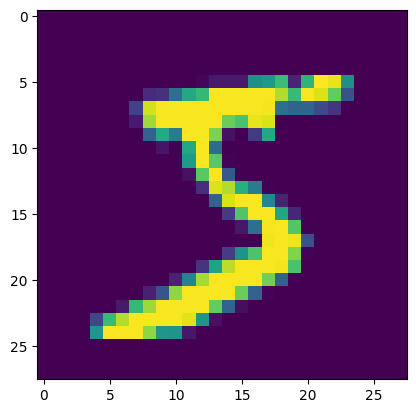

In [16]:
# Visualizing tensor with matplotlib
plt.imshow(image.reshape(28,28))

The actual image we have is grayscale image but becauase of matplotlib's default color mapping, we are getting a colored version.

We can also view this image in grayscale by manually providing color mapping.

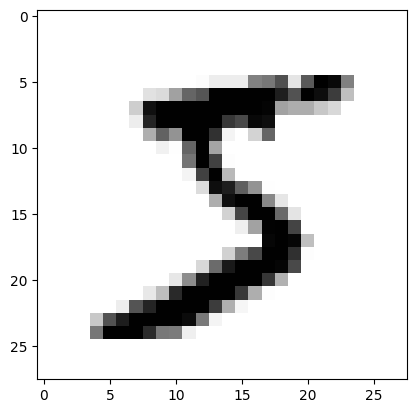

In [17]:
plt.imshow(image.reshape(28,28), cmap = 'gist_yarg')

### Creating DataLoader to load data in batches.

In [18]:
# Setting a random seed

torch.manual_seed(101)

# The initial seed can be any arbitrary number 

In [19]:
# Loading data using TrainLoader

train_loader = DataLoader(train_data, batch_size = 100, shuffle = True)

test_loader = DataLoader(test_data, batch_size = 500, shuffle = False)

In [20]:
# Inspecting dataset from dataloader

from torchvision.utils import make_grid
np.set_printoptions(formatter = dict(int = lambda x: f'{x:4}'))

In [21]:
# First Batch

for images, labels in train_loader:
  break

In [22]:
images.shape

torch.Size([100, 1, 28, 28])

In [23]:
labels.shape

torch.Size([100])

Labels :  [   7    2    3    5    8    5    3    6    9    9    1    3]


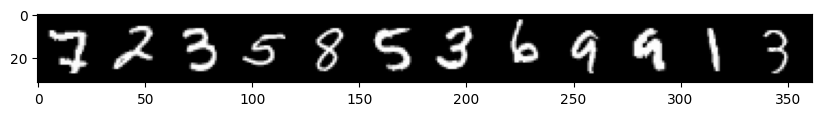

In [24]:
# Print the first 12 labels
print('Labels : ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow = 12)
plt.figure(figsize = (10, 4))

# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)), cmap = 'gray')

### Creating the NN model

In [25]:
# Create NN class

class MultiLayerPerceptron(nn.Module):

  # Constructor
  def __init__(self, in_size = 784, out_size = 10, layers = [120, 84]):
    super(MultiLayerPerceptron, self).__init__()

    self.fc1 = nn.Linear(in_size, layers[0])
    self.fc2 = nn.Linear(layers[0], layers[1])
    self.fc3 = nn.Linear(layers[1], out_size)


  # Activation

  def forward(self, X):

    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim = 1)


In [26]:
model = MultiLayerPerceptron()
model

MultiLayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [27]:
# Set the criterion function and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [28]:
# Flatten the image (EXAMPLE ONLY)
images.view(100, -1).shape

torch.Size([100, 784])

### Setting up the Training & Evaluation

In [29]:
# To calculate the time elapsed
import time
start_time = time.time()


##### TRAINING ####

epochs = 10

# For tracking 
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# Real training

for i in range(epochs):
  
  train_corr = 0
  test_corr = 0

  for batch, (X_train, y_train) in enumerate(train_loader):
    batch += 1

    # Predict and calculate loss
    y_pred = model(X_train.view(100, -1))
    loss = criterion(y_pred, y_train)

    # Calculate the number of correct predictions in a batch and total correct predictions in training data
    predicted = torch.max(y_pred.data, 1)[1]
    batch_correct = (predicted == y_train).sum()
    train_corr += batch_correct

    # Setting zero gradient and performing backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Reporting some information
    if batch%200 == 0:
      accuracy = train_corr.item()/(batch*100)
      print(f'For Epoch {i}, In batch {batch} Loss is : {loss.item()} and accuracy is : {accuracy}')


  train_losses.append(loss)
  train_correct.append(train_corr)



  # Check the test data
  with torch.no_grad():

    for batch, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test.view(500, -1))

      predicted = torch.max(y_val.data, 1)[1]
      test_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(test_corr)




total_time = time.time()-start_time
print(f'Duration : {total_time/60} minutes')

For Epoch 0, In batch 200 Loss is : 0.287929505109787 and accuracy is : 0.8305
For Epoch 0, In batch 400 Loss is : 0.25784730911254883 and accuracy is : 0.874275
For Epoch 0, In batch 600 Loss is : 0.2368019074201584 and accuracy is : 0.8946166666666666
For Epoch 1, In batch 200 Loss is : 0.17159925401210785 and accuracy is : 0.94785
For Epoch 1, In batch 400 Loss is : 0.06849920004606247 and accuracy is : 0.951
For Epoch 1, In batch 600 Loss is : 0.18482984602451324 and accuracy is : 0.9533833333333334
For Epoch 2, In batch 200 Loss is : 0.17636893689632416 and accuracy is : 0.9651
For Epoch 2, In batch 400 Loss is : 0.18148832023143768 and accuracy is : 0.965025
For Epoch 2, In batch 600 Loss is : 0.07688865810632706 and accuracy is : 0.9667
For Epoch 3, In batch 200 Loss is : 0.12140345573425293 and accuracy is : 0.9748
For Epoch 3, In batch 400 Loss is : 0.016630511730909348 and accuracy is : 0.9752
For Epoch 3, In batch 600 Loss is : 0.057627979665994644 and accuracy is : 0.974666

### Evaluation

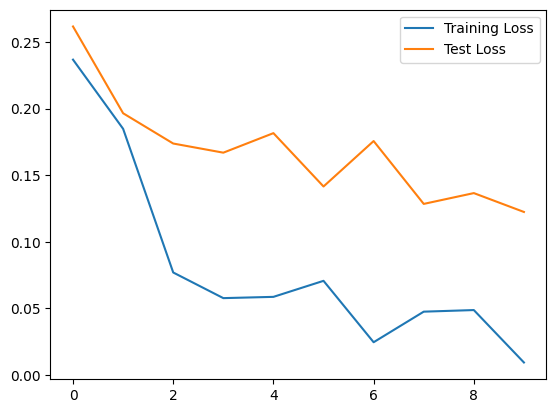

In [30]:
# Plotting the losses

plt.plot([tensor.detach().numpy() for tensor in train_losses], label = 'Training Loss')
plt.plot([tensor.detach().numpy() for tensor in test_losses], label = 'Test Loss')
plt.legend()

# .detach().numpy() is done to convert the pytorch tensor that requires grad to numpy array in order to plot using matplotlib

In [31]:
train_acc = [t/600 for t in train_correct]

In [32]:
test_acc = [t/100 for t in test_correct]

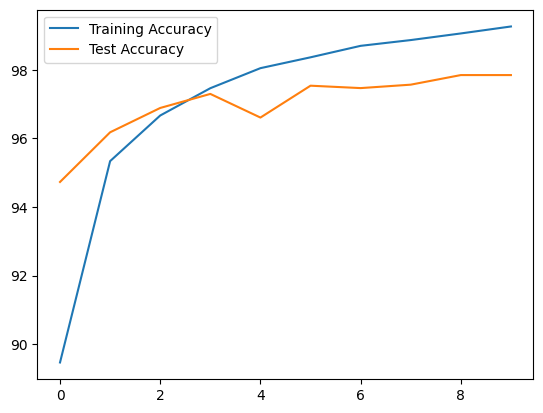

In [33]:
plt.plot([tensor.detach().numpy() for tensor in train_acc], label = 'Training Accuracy')
plt.plot([tensor.detach().numpy() for tensor in test_acc], label = 'Test Accuracy')
plt.legend()

In [34]:
# Testing with new unseen data

test_load_all = DataLoader(test_data, batch_size=10000, shuffle = False)


In [35]:
with torch.no_grad():
  correct = 0

  for X_test, y_test in test_load_all:
    y_val = model(X_test.view(len(X_test), -1))
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [36]:
print(f'Accuracy is : {correct.item()/len(y_test)}')

Accuracy is : 0.9785


In [37]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 964,    0,    2,    0,    1,    2,    0,    1,    0,    0],
       [   0, 1125,    0,    1,    1,    0,    3,    3,    0,    2],
       [   1,    3, 1011,    7,    2,    0,    5,    9,    5,    1],
       [   1,    1,    4,  991,    0,   11,    1,    3,    5,    5],
       [   1,    0,    1,    0,  964,    2,    5,    1,    3,   10],
       [   3,    0,    0,    4,    1,  863,    2,    0,    5,    5],
       [   3,    2,    2,    0,    4,    4,  938,    0,    2,    0],
       [   2,    0,    4,    4,    3,    0,    1, 1003,    2,    4],
       [   3,    4,    7,    2,    1,    7,    3,    3,  948,    4],
       [   2,    0,    1,    1,    5,    3,    0,    5,    4,  978]])